<a href="https://colab.research.google.com/github/zainab9271/Outfit-Recommendation-Project/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Kaggle Token

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 73 bytes


# Download the Data from Kaggle

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dnepozitek/polyvore-outfits

100% 6.21G/6.21G [00:45<00:00, 178MB/s]
100% 6.21G/6.21G [00:45<00:00, 146MB/s]


In [3]:
!unzip /content/polyvore-outfits.zip

Streaming output truncated to the last 5000 lines.
  inflating: polyvore_outfits/images/90489434.jpg  
  inflating: polyvore_outfits/images/90492213.jpg  
  inflating: polyvore_outfits/images/90492494.jpg  
  inflating: polyvore_outfits/images/90496029.jpg  
  inflating: polyvore_outfits/images/90497446.jpg  
  inflating: polyvore_outfits/images/90518135.jpg  
  inflating: polyvore_outfits/images/90518552.jpg  
  inflating: polyvore_outfits/images/90521419.jpg  
  inflating: polyvore_outfits/images/90524054.jpg  
  inflating: polyvore_outfits/images/90531717.jpg  
  inflating: polyvore_outfits/images/90537718.jpg  
  inflating: polyvore_outfits/images/90539482.jpg  
  inflating: polyvore_outfits/images/90540596.jpg  
  inflating: polyvore_outfits/images/90541187.jpg  
  inflating: polyvore_outfits/images/90543355.jpg  
  inflating: polyvore_outfits/images/90543409.jpg  
  inflating: polyvore_outfits/images/90543514.jpg  
  inflating: polyvore_outfits/images/90543898.jpg  
  inflating: 

# Prepare the Data

In [4]:
import pandas as pd
import numpy as np
import pathlib
import os
import tqdm
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create Dataframes

### polyvore_outfit_titles.json

In [ ]:
polyvore_outfit_titles_df = pd.read_json('/content/polyvore_outfits/polyvore_outfit_titles.json')
polyvore_outfit_titles_df = polyvore_outfit_titles_df.T
polyvore_outfit_titles_df

,url_name,title
219779031,spring trend colored denim,Denim Jumpers
211158670,boot scootin outfit only 2500,Stacked-Heel Boots
222049137,mermaid for life,"""Mermaid Hair, Don't Care"""
207880976,street style mini dress wrap,Blanket Wraps
171638917,high waisted jeans,High-Waisted Skinny Jeans
...,...,...
209395792,67 night guys,Apple Cider and Doughnuts
213634610,dance party,Dance Party
222597251,friday night,Friday Night
179451388,poncho in rain,Rain Ponchos


In [ ]:
polyvore_outfit_titles_df['outfit_id'] = polyvore_outfit_titles_df.index
polyvore_outfit_titles_df.reset_index(drop=True, inplace=True)

In [ ]:
polyvore_outfit_titles_df.head(10)

,url_name,title,outfit_id
0,spring trend colored denim,Denim Jumpers,219779031
1,boot scootin outfit only 2500,Stacked-Heel Boots,211158670
2,mermaid for life,"""Mermaid Hair, Don't Care""",222049137
3,street style mini dress wrap,Blanket Wraps,207880976
4,high waisted jeans,High-Waisted Skinny Jeans,171638917
5,casual statement,Chambray Dresses,81476629
6,lake studio floral stitched embroidered,Embroidered Coats,219905886
7,spring date made my friend,Friend Date,215768200
8,pack go rio,Rio,205180079
9,heres to everything,Holiday Fun Run,96522071


In [ ]:
print(f'Total number of outfits = {polyvore_outfit_titles_df.shape[0]}')

Total number of outfits = 68306


#### Make Pickle

In [ ]:
polyvore_outfit_titles_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/outfit_titles_df.pkl')

### polyvore_item_metadata.json

In [ ]:
polyvore_item_metadata_df = pd.read_json('/content/polyvore_outfits/polyvore_item_metadata.json')
polyvore_item_metadata_df

,211990161,183179503,152771755,190445143,211444470,192704091,117334561,127403908,149817672,210309753,...,201233356,129890527,197205553,142700536,192169702,108411005,212452593,208651882,209210426,181567392
url_name,neck print chiffon plus size,christian pellizzari floral jacquard trousers,natures jewelry stainless steel not,balmain women high waist flared,acler orson high waist belted,christian louboutin girlystrappi bow 100mm,sacai luck cable knit cardigan,lapel loose woolen pink coat,dolce gabbana roll neck sweater,rhinestone devil eye box chain,...,pre-owned giuseppe zanotti suede platform,raga statement pendant necklace,belated punk zip up jacket,red faux suede polished strappy,jean skinny empi%C3%A8cement brod%C3%A9 la,arnica embellished hand painted skirt,thom browne little boy knitted,colorful vortex print shawl scarf,floral embroidered mesh see thru,shein sheinside extreme destroyed denim
description,,Gold and black silk blend floral jacquard trou...,,Decorative gold colored buttons with lion deta...,This Acler Orson High Waist Belted Short featu...,Christian Louboutin patent leather and denim s...,,Pink Plain Coats Woolen Polyester Collar Fashi...,Black cashmere roll neck sweater from Dolce &...,,...,Purple suede Giuseppe Zanotti platform sandals...,,,Make sure to add these sexy heels to your coll...,,Shop Stella Jean in our expertly curated in-se...,,,,
catgeories,,"[Women's Fashion, Clothing, Pants, Christian P...",,"[Women's Fashion, Clothing, Pants, Balmain pants]","[Women's Fashion, Clothing, Shorts, Marissa We...","[Women's Fashion, Shoes, Sandals, Christian Lo...",,"[Women's Fashion, Clothing, Outerwear, Coats]","[Women's Fashion, Tops, Sweaters, Dolce&Gabban...",,...,"[Women's Fashion, Shoes, Sandals, Giuseppe Zan...",,,"[Women's Fashion, Shoes, Pumps]",,"[Women's Fashion, Clothing, Skirts, Knee Lengt...",,,,
title,,Christian Pellizzari floral jacquard trousers,,Balmain Women High Waist Flared Knit Pants,Acler Orson High Waist Belted Short,Christian Louboutin Girlystrappi Bow 100mm Red...,,Lapel Loose Woolen Pink Coat,Dolce & Gabbana roll neck sweater,,...,Pre-owned Giuseppe Zanotti Suede Platform Sandals,,,Red Faux Suede Polished Strappy Peep Toe Heels,,Arnica Embellished Hand Painted Skirt,,,,
related,,"[Floral pants, Grey pants, Print pants, Patter...",,"[Balmain, Flared pants, High-waisted pants, Kn...","[Short shorts, High-waisted shorts, High rise ...","[Christian Louboutin, Red sole shoes, Patent l...",,"[Woolen coat, Pink coat, Fur-collar wool coats...","[Dolce&Gabbana, Long sleeve tops, Rollneck swe...",,...,"[Giuseppe Zanotti, Suede shoes, Purple shoes, ...",,,"[Platform pumps, Red pumps, Peep toe pumps, Hi...",,"[Red skirt, Embellished skirt]",,,,
category_id,15,28,65,28,29,46,18,24,19,106,...,46,62,25,43,237,9,236,105,11,25
semantic_category,tops,bottoms,jewellery,bottoms,bottoms,shoes,outerwear,outerwear,tops,jewellery,...,shoes,jewellery,outerwear,shoes,bottoms,bottoms,outerwear,scarves,tops,outerwear


In [ ]:
polyvore_item_metadata_df = polyvore_item_metadata_df.T
polyvore_item_metadata_df['item_id'] = polyvore_item_metadata_df.index
polyvore_item_metadata_df.reset_index(drop=True, inplace=True)

In [ ]:
polyvore_item_metadata_df.head(5)

,url_name,description,catgeories,title,related,category_id,semantic_category,item_id
0,neck print chiffon plus size,,,,,15,tops,211990161
1,christian pellizzari floral jacquard trousers,Gold and black silk blend floral jacquard trou...,"[Women's Fashion, Clothing, Pants, Christian P...",Christian Pellizzari floral jacquard trousers,"[Floral pants, Grey pants, Print pants, Patter...",28,bottoms,183179503
2,natures jewelry stainless steel not,,,,,65,jewellery,152771755
3,balmain women high waist flared,Decorative gold colored buttons with lion deta...,"[Women's Fashion, Clothing, Pants, Balmain pants]",Balmain Women High Waist Flared Knit Pants,"[Balmain, Flared pants, High-waisted pants, Kn...",28,bottoms,190445143
4,acler orson high waist belted,This Acler Orson High Waist Belted Short featu...,"[Women's Fashion, Clothing, Shorts, Marissa We...",Acler Orson High Waist Belted Short,"[Short shorts, High-waisted shorts, High rise ...",29,bottoms,211444470


In [ ]:
print(f'Number of Items = {polyvore_item_metadata_df.shape[0]}')

Number of Items = 251008


In [ ]:
print(f'Number of Images = {len(os.listdir("/content/polyvore_outfits/images"))}')

Number of Images = 261057


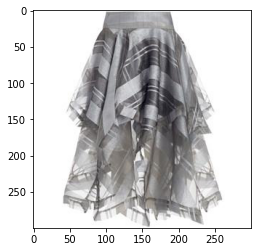

In [ ]:
img = mpimg.imread('/content/polyvore_outfits/images/104934947.jpg')
plt.imshow(img)

#### Make Pickle

In [ ]:
polyvore_item_metadata_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/item_metadata_df.pkl')

### images

In [ ]:
images_path = np.array(glob.glob('/content/polyvore_outfits/images'+'/'+'*.jpg'))
print(len(images_path))
print(images_path)

261057
['/content/polyvore_outfits/images/154753688.jpg'
 '/content/polyvore_outfits/images/147079037.jpg'
 '/content/polyvore_outfits/images/183697179.jpg' ...
 '/content/polyvore_outfits/images/205720109.jpg'
 '/content/polyvore_outfits/images/113105626.jpg'
 '/content/polyvore_outfits/images/139754715.jpg']


In [ ]:
def get_item_id(img_path):
    item_file = os.path.basename(img_path)
    item_id = pathlib.Path(item_file).with_suffix("")
    return item_id.name

In [ ]:
item_image_df = pd.DataFrame(columns=['item_id', 'item_image_path'])
item_image_df.item_image_path = images_path
item_image_df.item_id = item_image_df.item_image_path.apply(get_item_id)
item_image_df

,item_id,item_image_path
0,154753688,/content/polyvore_outfits/images/154753688.jpg
1,147079037,/content/polyvore_outfits/images/147079037.jpg
2,183697179,/content/polyvore_outfits/images/183697179.jpg
3,203028726,/content/polyvore_outfits/images/203028726.jpg
4,142036756,/content/polyvore_outfits/images/142036756.jpg
...,...,...
261052,189145237,/content/polyvore_outfits/images/189145237.jpg
261053,181249106,/content/polyvore_outfits/images/181249106.jpg
261054,205720109,/content/polyvore_outfits/images/205720109.jpg
261055,113105626,/content/polyvore_outfits/images/113105626.jpg


#### Make Pickle

In [ ]:
item_image_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/item_image_df.pkl')

### categories.csv

In [ ]:
categories_df = pd.read_csv('/content/polyvore_outfits/categories.csv', header=0, names=['category_id', 'fine_grained_category', 'semantic_category'])
categories_df

,category_id,fine_grained_category,semantic_category
0,3,dress,all-body
1,4,dress,all-body
2,5,dress,all-body
3,6,gown,all-body
4,7,skirt,bottoms
...,...,...,...
218,4495,sweathirt,tops
219,4495,sweater,tops
220,4496,hoodie,tops
221,4517,swimsuit top,tops


#### Make Pickle

In [ ]:
categories_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/categories_df.pkl')

### disjoint

In [ ]:
items_id_list = item_image_df.item_id.to_numpy()
items_id_list

array(['154753688', '147079037', '183697179', ..., '205720109',
       '113105626', '139754715'], dtype=object)

In [ ]:
images_path_list = item_image_df.item_image_path.to_numpy()
images_path_list

array(['/content/polyvore_outfits/images/154753688.jpg',
       '/content/polyvore_outfits/images/147079037.jpg',
       '/content/polyvore_outfits/images/183697179.jpg', ...,
       '/content/polyvore_outfits/images/205720109.jpg',
       '/content/polyvore_outfits/images/113105626.jpg',
       '/content/polyvore_outfits/images/139754715.jpg'], dtype=object)

In [ ]:
def build_outfit(row): 
  
  dic_outfit={}
  for item_dict in row[0]:
    item_path = images_path_list[np.where(items_id_list == str(item_dict['item_id']))[0][0]]
    dic_outfit[f'{row[1]}_{item_dict["index"]}'] = item_path
    
  return dic_outfit
  

#### train.json

In [ ]:
disjiont_train_df= pd.read_json("/content/polyvore_outfits/disjoint/train.json")
disjiont_train_df

,items,set_id
0,"[{'item_id': '132621870', 'index': 1}, {'item_...",199244701
1,"[{'item_id': '162715806', 'index': 1}, {'item_...",200742384
2,"[{'item_id': '180028994', 'index': 1}, {'item_...",206955877
3,"[{'item_id': '198643069', 'index': 1}, {'item_...",220340816
4,"[{'item_id': '200139640', 'index': 1}, {'item_...",219393187
...,...,...
16990,"[{'item_id': '174197824', 'index': 1}, {'item_...",205231354
16991,"[{'item_id': '189119660', 'index': 1}, {'item_...",211884833
16992,"[{'item_id': '198170894', 'index': 1}, {'item_...",217542558
16993,"[{'item_id': '180489704', 'index': 1}, {'item_...",205613256


In [ ]:
disjiont_train_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(disjiont_train_df.iloc[10,1])
disjiont_train_df.iloc[10,0]

225139325


[{'index': 1, 'item_id': '213007746'},
 {'index': 2, 'item_id': '212992927'},
 {'index': 3, 'item_id': '214327110'},
 {'index': 4, 'item_id': '207668984'},
 {'index': 5, 'item_id': '181900351'},
 {'index': 6, 'item_id': '202212715'}]

In [ ]:
disjiont_train_outfits_df=disjiont_train_df.copy()

for i in tqdm.tqdm(range(disjiont_train_outfits_df.shape[0])):
    disjiont_train_outfits_df.at[i,'outfit_items'] = build_outfit(disjiont_train_outfits_df.iloc[i])


100%|██████████| 16995/16995 [11:36<00:00, 24.42it/s]


In [ ]:
print(disjiont_train_outfits_df.iloc[10,1])
disjiont_train_outfits_df.iloc[10,0]

225139325


{'225139325_1': '/content/polyvore_outfits/images/213007746.jpg',
 '225139325_2': '/content/polyvore_outfits/images/212992927.jpg',
 '225139325_3': '/content/polyvore_outfits/images/214327110.jpg',
 '225139325_4': '/content/polyvore_outfits/images/207668984.jpg',
 '225139325_5': '/content/polyvore_outfits/images/181900351.jpg',
 '225139325_6': '/content/polyvore_outfits/images/202212715.jpg'}

##### Make Pickle

In [ ]:
disjiont_train_outfits_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/disjiont_train_outfits_df.pkl')

#### test.json

In [ ]:
disjiont_test_df= pd.read_json("/content/polyvore_outfits/disjoint/test.json")
disjiont_test_df

,items,set_id
0,"[{'item_id': '159402796', 'index': 1}, {'item_...",222049137
1,"[{'item_id': '58893791', 'index': 1}, {'item_i...",171638917
2,"[{'item_id': '147772496', 'index': 1}, {'item_...",209614451
3,"[{'item_id': '172213324', 'index': 1}, {'item_...",208805759
4,"[{'item_id': '146453731', 'index': 1}, {'item_...",181727193
...,...,...
15140,"[{'item_id': '110258509', 'index': 1}, {'item_...",130442086
15141,"[{'item_id': '159369228', 'index': 1}, {'item_...",191016735
15142,"[{'item_id': '150478161', 'index': 1}, {'item_...",179451388
15143,"[{'item_id': '32286230', 'index': 1}, {'item_i...",42911078


In [ ]:
disjiont_test_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(disjiont_test_df.iloc[100,1])
disjiont_test_df.iloc[100,0]

191671357


[{'index': 1, 'item_id': '162281351'},
 {'index': 2, 'item_id': '162284763'},
 {'index': 3, 'item_id': '160720385'},
 {'index': 4, 'item_id': '158799041'},
 {'index': 5, 'item_id': '146340382'}]

In [ ]:
disjiont_test_outfits_df=disjiont_test_df.copy()

for i in tqdm.tqdm(range(disjiont_test_outfits_df.shape[0])):
    disjiont_test_outfits_df.at[i,'outfit_items'] = build_outfit(disjiont_test_outfits_df.iloc[i])


100%|██████████| 15145/15145 [10:05<00:00, 25.00it/s]


In [ ]:
print(disjiont_test_outfits_df.iloc[100,1])
disjiont_test_outfits_df.iloc[100,0]

191671357


{'191671357_1': '/content/polyvore_outfits/images/162281351.jpg',
 '191671357_2': '/content/polyvore_outfits/images/162284763.jpg',
 '191671357_3': '/content/polyvore_outfits/images/160720385.jpg',
 '191671357_4': '/content/polyvore_outfits/images/158799041.jpg',
 '191671357_5': '/content/polyvore_outfits/images/146340382.jpg'}

##### Make Pickle

In [ ]:
disjiont_test_outfits_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/disjiont_test_outfits_df.pkl')

#### valid.json

In [ ]:
disjiont_valid_df= pd.read_json("/content/polyvore_outfits/disjoint/valid.json")
disjiont_valid_df


,items,set_id
0,"[{'item_id': '211863963', 'index': 1}, {'item_...",223648758
1,"[{'item_id': '194622168', 'index': 1}, {'item_...",219849644
2,"[{'item_id': '184947151', 'index': 1}, {'item_...",208264087
3,"[{'item_id': '117828723', 'index': 1}, {'item_...",135005113
4,"[{'item_id': '196507149', 'index': 1}, {'item_...",216934649
...,...,...
2995,"[{'item_id': '191365709', 'index': 1}, {'item_...",221001144
2996,"[{'item_id': '157133142', 'index': 1}, {'item_...",179889650
2997,"[{'item_id': '48410374', 'index': 1}, {'item_i...",224578373
2998,"[{'item_id': '164514051', 'index': 1}, {'item_...",198313686


In [ ]:
disjiont_valid_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(disjiont_valid_df.iloc[1000,1])
disjiont_valid_df.iloc[1000,0]

212515017


[{'index': 1, 'item_id': '191695202'},
 {'index': 2, 'item_id': '194658747'},
 {'index': 3, 'item_id': '128427174'},
 {'index': 4, 'item_id': '146391713'},
 {'index': 5, 'item_id': '164208844'}]

In [ ]:
disjiont_valid_outfits_df=disjiont_valid_df.copy()

for i in tqdm.tqdm(range(disjiont_valid_outfits_df.shape[0])):
    disjiont_valid_outfits_df.at[i,'outfit_items'] = build_outfit(disjiont_valid_outfits_df.iloc[i])

100%|██████████| 3000/3000 [02:02<00:00, 24.56it/s]


In [ ]:
print(disjiont_valid_outfits_df.iloc[1000,1])
disjiont_valid_outfits_df.iloc[1000,0]

212515017


{'212515017_1': '/content/polyvore_outfits/images/191695202.jpg',
 '212515017_2': '/content/polyvore_outfits/images/194658747.jpg',
 '212515017_3': '/content/polyvore_outfits/images/128427174.jpg',
 '212515017_4': '/content/polyvore_outfits/images/146391713.jpg',
 '212515017_5': '/content/polyvore_outfits/images/164208844.jpg'}

##### Make Pickle

In [ ]:
disjiont_valid_outfits_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/disjiont_valid_outfits_df.pkl')

#### compatibility_test.txt

In [9]:
with open('/content/polyvore_outfits/disjoint/compatibility_test.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

compatibility_test_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

compatibility_test_df

,compatibility,outfit_sample
0,1,"[222049137_1, 222049137_2, 222049137_3, 222049..."
1,1,"[171638917_1, 171638917_2, 171638917_3, 171638..."
2,1,"[209614451_1, 209614451_2, 209614451_3, 209614..."
3,1,"[208805759_1, 208805759_2, 208805759_3, 208805..."
4,1,"[181727193_1, 181727193_2, 181727193_3, 181727..."
...,...,...
30285,0,"[208697202_1, 222058995_1, 60152115_3, 9792134..."
30286,0,"[163646445_2, 154832568_2, 190013480_4, 214779..."
30287,0,"[145970783_1, 190480945_1, 212286826_4, 707638..."
30288,0,"[177747016_1, 178806147_2, 164069948_5, 209157..."


##### Make Pickle

In [13]:
compatibility_test_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/disjoint_compatibility_test_outfits_df.pkl')

#### compatibility_train.txt

In [11]:
with open('/content/polyvore_outfits/disjoint/compatibility_train.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

compatibility_train_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

compatibility_train_df

,compatibility,outfit_sample
0,1,"[199244701_1, 199244701_2, 199244701_3, 199244..."
1,1,"[200742384_1, 200742384_2, 200742384_3, 200742..."
2,1,"[206955877_1, 206955877_2, 206955877_3, 206955..."
3,1,"[220340816_1, 220340816_2, 220340816_3, 220340..."
4,1,"[219393187_1, 219393187_2, 219393187_3, 219393..."
...,...,...
33985,0,"[218506324_1, 221405016_1, 206461374_3, 218864..."
33986,0,"[105184990_1, 211494606_3, 204086912_4, 220595..."
33987,0,"[66630383_1, 132553628_1, 224927539_2, 2234803..."
33988,0,"[149252664_1, 224932578_2, 205854787_3, 206523..."


##### Make Pickle

In [14]:
compatibility_train_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/disjoint_compatibility_train_outfits_df.pkl')

#### compatibility_valid.txt

In [15]:
with open('/content/polyvore_outfits/disjoint/compatibility_valid.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

compatibility_valid_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

compatibility_valid_df

,compatibility,outfit_sample
0,1,"[223648758_1, 223648758_2, 223648758_3, 223648..."
1,1,"[219849644_1, 219849644_2, 219849644_3, 219849..."
2,1,"[208264087_1, 208264087_2, 208264087_3, 208264..."
3,1,"[135005113_1, 135005113_2, 135005113_3, 135005..."
4,1,"[216934649_1, 216934649_2, 216934649_3, 216934..."
...,...,...
5995,0,"[215216859_1, 206870729_2, 209124426_3, 222275..."
5996,0,"[77811896_1, 207209295_2, 185443035_4, 1622178..."
5997,0,"[214362907_1, 225321688_3, 158405253_9, 209425..."
5998,0,"[209869925_1, 204014202_3, 200907615_2, 223147..."


##### Make Pickle

In [16]:
compatibility_valid_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/disjoint_compatibility_valid_outfits_df.pkl')

#### fill_in_blank_test.json

##### Make Pickle

#### fill_in_blank_train.json

##### Make Pickle

#### fill_in_blank_valid.json

##### Make Pickle

### nondisjoint

#### train.json

In [ ]:
nondisjiont_train_df= pd.read_json("/content/polyvore_outfits/nondisjoint/train.json")
nondisjiont_train_df

,items,set_id
0,"[{'item_id': '154249722', 'index': 1}, {'item_...",210750761
1,"[{'item_id': '201813350', 'index': 1}, {'item_...",217602530
2,"[{'item_id': '201799451', 'index': 1}, {'item_...",221884093
3,"[{'item_id': '165668728', 'index': 1}, {'item_...",202131990
4,"[{'item_id': '214359927', 'index': 1}, {'item_...",224733539
...,...,...
53301,"[{'item_id': '187299897', 'index': 1}, {'item_...",217056080
53302,"[{'item_id': '163670628', 'index': 1}, {'item_...",199928836
53303,"[{'item_id': '154665034', 'index': 1}, {'item_...",223309013
53304,"[{'item_id': '207597035', 'index': 1}, {'item_...",221204003


In [ ]:
nondisjiont_train_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(nondisjiont_train_df.iloc[10,1])
nondisjiont_train_df.iloc[10,0]

224076663


[{'index': 1, 'item_id': '204552789'},
 {'index': 2, 'item_id': '207097776'},
 {'index': 3, 'item_id': '202062237'}]

In [ ]:
nondisjiont_train_outfits_df=nondisjiont_train_df.copy()

for i in tqdm.tqdm(range(nondisjiont_train_outfits_df.shape[0])):
    nondisjiont_train_outfits_df.at[i,'outfit_items'] = build_outfit(nondisjiont_train_outfits_df.iloc[i])


100%|██████████| 53306/53306 [37:30<00:00, 23.69it/s]


In [ ]:
print(nondisjiont_train_outfits_df.iloc[10,1])
nondisjiont_train_outfits_df.iloc[10,0]

224076663


{'224076663_1': '/content/polyvore_outfits/images/204552789.jpg',
 '224076663_2': '/content/polyvore_outfits/images/207097776.jpg',
 '224076663_3': '/content/polyvore_outfits/images/202062237.jpg'}

##### Make Pickle

In [ ]:
nondisjiont_train_outfits_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/nondisjiont_train_outfits_df.pkl')

#### test.json

In [ ]:
nondisjiont_test_df= pd.read_json("/content/polyvore_outfits/nondisjoint/test.json")
nondisjiont_test_df

,items,set_id
0,"[{'item_id': '193458045', 'index': 1}, {'item_...",217320763
1,"[{'item_id': '180793385', 'index': 1}, {'item_...",221590515
2,"[{'item_id': '32286230', 'index': 1}, {'item_i...",42911078
3,"[{'item_id': '158586279', 'index': 1}, {'item_...",211636597
4,"[{'item_id': '124999565', 'index': 1}, {'item_...",147466579
...,...,...
9995,"[{'item_id': '185863255', 'index': 1}, {'item_...",214429261
9996,"[{'item_id': '181203442', 'index': 1}, {'item_...",223909622
9997,"[{'item_id': '189510855', 'index': 1}, {'item_...",221022847
9998,"[{'item_id': '175874723', 'index': 1}, {'item_...",223952796


In [ ]:
nondisjiont_test_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(nondisjiont_test_df.iloc[100,1])
nondisjiont_test_df.iloc[100,0]

195929318


[{'index': 1, 'item_id': '163909255'},
 {'index': 2, 'item_id': '151857355'},
 {'index': 3, 'item_id': '167326795'},
 {'index': 4, 'item_id': '139941662'},
 {'index': 5, 'item_id': '163583571'},
 {'index': 6, 'item_id': '163444294'}]

In [ ]:
nondisjiont_test_outfits_df=nondisjiont_test_df.copy()

for i in tqdm.tqdm(range(nondisjiont_test_outfits_df.shape[0])):
    nondisjiont_test_outfits_df.at[i,'outfit_items'] = build_outfit(nondisjiont_test_outfits_df.iloc[i])


100%|██████████| 10000/10000 [07:04<00:00, 23.53it/s]


In [ ]:
print(nondisjiont_test_outfits_df.iloc[100,1])
nondisjiont_test_outfits_df.iloc[100,0]

195929318


{'195929318_1': '/content/polyvore_outfits/images/163909255.jpg',
 '195929318_2': '/content/polyvore_outfits/images/151857355.jpg',
 '195929318_3': '/content/polyvore_outfits/images/167326795.jpg',
 '195929318_4': '/content/polyvore_outfits/images/139941662.jpg',
 '195929318_5': '/content/polyvore_outfits/images/163583571.jpg',
 '195929318_6': '/content/polyvore_outfits/images/163444294.jpg'}

##### Make Pickle

In [ ]:
nondisjiont_test_outfits_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/nondisjiont_test_outfits_df.pkl')

#### valid.json

In [ ]:
nondisjiont_valid_df= pd.read_json("/content/polyvore_outfits/nondisjoint/valid.json")
nondisjiont_valid_df


,items,set_id
0,"[{'item_id': '213343990', 'index': 1}, {'item_...",224930161
1,"[{'item_id': '182121462', 'index': 1}, {'item_...",208756998
2,"[{'item_id': '206948767', 'index': 1}, {'item_...",218698690
3,"[{'item_id': '174026597', 'index': 1}, {'item_...",201033839
4,"[{'item_id': '177476594', 'index': 1}, {'item_...",205002070
...,...,...
4995,"[{'item_id': '155050099', 'index': 1}, {'item_...",205895819
4996,"[{'item_id': '126083905', 'index': 1}, {'item_...",187000627
4997,"[{'item_id': '89240239', 'index': 1}, {'item_i...",148811503
4998,"[{'item_id': '203778851', 'index': 1}, {'item_...",222095434


In [ ]:
nondisjiont_valid_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(nondisjiont_valid_df.iloc[1000,1])
nondisjiont_valid_df.iloc[1000,0]

218200213


[{'index': 1, 'item_id': '201328901'},
 {'index': 2, 'item_id': '201894819'},
 {'index': 3, 'item_id': '131345098'}]

In [ ]:
nondisjiont_valid_outfits_df=nondisjiont_valid_df.copy()

for i in tqdm.tqdm(range(nondisjiont_valid_outfits_df.shape[0])):
    nondisjiont_valid_outfits_df.at[i,'outfit_items'] = build_outfit(nondisjiont_valid_outfits_df.iloc[i])

100%|██████████| 5000/5000 [03:30<00:00, 23.72it/s]


In [ ]:
print(nondisjiont_valid_outfits_df.iloc[1000,1])
nondisjiont_valid_outfits_df.iloc[1000,0]

218200213


{'218200213_1': '/content/polyvore_outfits/images/201328901.jpg',
 '218200213_2': '/content/polyvore_outfits/images/201894819.jpg',
 '218200213_3': '/content/polyvore_outfits/images/131345098.jpg'}

##### Make Pickle

In [ ]:
nondisjiont_valid_outfits_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/nondisjiont_valid_outfits_df.pkl')

#### compatibility_test.txt

In [17]:
with open('/content/polyvore_outfits/nondisjoint/compatibility_test.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

nondis_compatibility_test_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

nondis_compatibility_test_df

,compatibility,outfit_sample
0,1,"[217320763_1, 217320763_2, 217320763_3, 217320..."
1,1,"[221590515_1, 221590515_2, 221590515_3, 221590..."
2,1,"[42911078_1, 42911078_2, 42911078_3, 42911078_..."
3,1,"[211636597_1, 211636597_2, 211636597_3]"
4,1,"[147466579_1, 147466579_2, 147466579_3, 147466..."
...,...,...
19995,0,"[203469057_1, 219275868_2, 222091890_4, 225280..."
19996,0,"[218091098_1, 224988733_2, 224271783_4, 206065..."
19997,0,"[164859347_1, 204403823_2, 211355335_2, 192087..."
19998,0,"[200971076_2, 55074652_3, 223396804_5, 2193202..."


##### Make Pickle

In [18]:
nondis_compatibility_test_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/nondisjoint_compatibility_test_outfits_df.pkl')

#### compatibility_train.txt

In [19]:
with open('/content/polyvore_outfits/nondisjoint/compatibility_train.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

nondis_compatibility_train_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

nondis_compatibility_train_df

,compatibility,outfit_sample
0,1,"[210750761_1, 210750761_2, 210750761_3]"
1,1,"[217602530_1, 217602530_2, 217602530_3, 217602..."
2,1,"[221884093_1, 221884093_2, 221884093_3]"
3,1,"[202131990_1, 202131990_2, 202131990_3, 202131..."
4,1,"[224733539_1, 224733539_2, 224733539_3, 224733..."
...,...,...
106607,0,"[217860736_1, 224541745_2, 199143075_4, 214478..."
106608,0,"[208521302_1, 199392960_2, 225328029_4, 159071..."
106609,0,"[25727597_1, 223239394_3, 208198070_6, 2118114..."
106610,0,"[140474653_1, 201200959_2, 216137927_3, 224525..."


##### Make Pickle

In [20]:
nondis_compatibility_train_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/nondisjoint_compatibility_train_outfits_df.pkl')

#### compatibility_valid.txt

In [21]:
with open('/content/polyvore_outfits/nondisjoint/compatibility_valid.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

nondis_compatibility_valid_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

nondis_compatibility_valid_df

,compatibility,outfit_sample
0,1,"[224930161_1, 224930161_2, 224930161_3, 224930..."
1,1,"[208756998_1, 208756998_2, 208756998_3, 208756..."
2,1,"[218698690_1, 218698690_2, 218698690_3, 218698..."
3,1,"[201033839_1, 201033839_2, 201033839_3, 201033..."
4,1,"[205002070_1, 205002070_2, 205002070_3, 205002..."
...,...,...
9995,0,"[220412826_1, 155874314_2, 221171445_3, 219887..."
9996,0,"[208114050_5, 209791775_2, 218470419_4, 547508..."
9997,0,"[223128874_1, 76793789_3, 206348715_2, 2223241..."
9998,0,"[224432797_1, 223532223_2, 217770726_2, 224005..."


##### Make Pickle

In [22]:
nondis_compatibility_valid_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/nondisjoint_compatibility_valid_outfits_df.pkl')

#### fill_in_blank_test.json

##### Make Pickle

#### fill_in_blank_train.json

##### Make Pickle

#### fill_in_blank_valid.json

##### Make Pickle

### maryland_polyvore_hardneg

#### compatibility_test.txt

In [23]:
with open('/content/polyvore_outfits/maryland_polyvore_hardneg/compatibility_test.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

maryland_compatibility_test_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

maryland_compatibility_test_df

,compatibility,outfit_sample
0,1,"[119704139_1, 119704139_2, 119704139_3, 119704..."
1,1,"[119314458_1, 119314458_2, 119314458_3, 119314..."
2,1,"[147361785_1, 147361785_2, 147361785_3, 147361..."
3,1,"[148015877_1, 148015877_2, 148015877_3, 148015..."
4,1,"[192637078_1, 192637078_2, 192637078_3, 192637..."
...,...,...
6076,0,"[132495503_1, 175144454_2, 204421067_3, 216720..."
6077,0,"[127082606_1, 191465208_2, 187850258_3, 162747..."
6078,0,"[216679526_1, 207694450_2, 118559582_3, 137030..."
6079,0,"[198298738_1, 216299828_2, 156245664_3, 186297..."


##### Make Pickle

In [24]:
maryland_compatibility_test_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/maryland_compatibility_test_outfits_df.pkl')

#### compatibility_train.txt

In [25]:
with open('/content/polyvore_outfits/maryland_polyvore_hardneg/compatibility_train.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

maryland_compatibility_train_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

maryland_compatibility_train_df

,compatibility,outfit_sample
0,1,"[214181831_1, 214181831_2, 214181831_3, 214181..."
1,1,"[120161271_1, 120161271_2, 120161271_3, 120161..."
2,1,"[143656996_1, 143656996_2, 143656996_3, 143656..."
3,1,"[186627934_1, 186627934_2, 186627934_3, 186627..."
4,1,"[206969379_1, 206969379_2, 206969379_3, 206969..."
...,...,...
34503,0,"[202676434_1, 214375288_2, 158366779_3, 215994..."
34504,0,"[212434593_1, 204366957_2, 215918692_3, 116577..."
34505,0,"[214613068_1, 210064739_2, 211763424_3, 216560..."
34506,0,"[204530373_1, 201201356_2, 216009257_3, 190488..."


##### Make Pickle

In [26]:
maryland_compatibility_train_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/maryland_compatibility_train_outfits_df.pkl')

#### compatibility_valid.txt

In [27]:
with open('/content/polyvore_outfits/maryland_polyvore_hardneg/compatibility_valid.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

maryland_compatibility_valid_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

maryland_compatibility_valid_df

,compatibility,outfit_sample
0,1,"[209512492_1, 209512492_2, 209512492_3, 209512..."
1,1,"[202881124_1, 202881124_2, 202881124_3, 202881..."
2,1,"[204980379_1, 204980379_2, 204980379_3, 204980..."
3,1,"[204510570_1, 204510570_2, 204510570_3, 204510..."
4,1,"[214272106_1, 214272106_2, 214272106_3, 214272..."
...,...,...
2959,0,"[129459587_1, 214822788_2, 196993824_3, 216049..."
2960,0,"[208861068_1, 125915024_2, 199902774_3, 170749..."
2961,0,"[189099394_1, 217011829_2, 165431994_3, 151650..."
2962,0,"[211457853_1, 200290225_2, 164788786_3, 192465..."


##### Make Pickle

In [28]:
maryland_compatibility_valid_df.to_pickle('/content/drive/MyDrive/Outfit_Recommendation_Project/Dataframe_Pickles/maryland_compatibility_valid_outfits_df.pkl')

#### fill_in_blank_test.json

##### Make Pickle

#### fill_in_blank_train.json

##### Make Pickle

#### fill_in_blank_valid.json

##### Make Pickle